In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Javascript
import shap
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

In [6]:
df.drop([' Current Liability to Liability', ' Net Income Flag'], axis = 1, inplace= True)

In [7]:
df.shape

(6819, 94)

# Separating the dataset

In [8]:
X = df.drop(['Bankrupt?'], axis = 1)
y = df['Bankrupt?']

# Selecting features with the K-best method

In [9]:
X1 = X.copy()

In [10]:
from sklearn.preprocessing import MinMaxScaler 
transformer = MinMaxScaler().fit(X1)
x_normalized = transformer.transform(X1)
X2 = pd.DataFrame(x_normalized, columns= X1.columns)

In [11]:
from sklearn.feature_selection import SelectKBest, chi2

kbest = SelectKBest(chi2, k=50) 
kbest.fit(X2,y)
X_new = kbest.transform(X2) 
selected_columns = [X2.columns[index] for index, value in enumerate(kbest.get_support().tolist()) if value == True]
selected = pd.DataFrame(X_new, columns = selected_columns)
selected.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Quick Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Total Asset Turnover,Average Collection Days,Fixed Assets Turnover Frequency,Revenue per person,Operating profit per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Current Liabilities/Liability,Retained Earnings to Total Assets,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,CFO to Assets,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,Liability to Equity,Equity to Liability
0,0.370594,0.424389,0.405750,0.000000,7.323965e-13,0.0,0.147950,0.147950,0.147950,0.169141,0.095921,0.138736,0.498498,3.504580e-14,1.308510e-13,2.139429e-12,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.086957,3.584136e-13,1.166173e-14,3.877887e-12,0.392913,0.672775,0.166673,0.190643,0.004094,1.526798e-14,0.147308,0.334015,0.676269,0.903225,0.064856,7.010000e-02,6.550000e-01,0.0458,5.098627e-11,0.126549,0.520382,0.118250,0.0,0.716845,9.388432e-13,0.290202,0.016469
1,0.464291,0.538214,0.516730,0.000000,6.536007e-13,0.0,0.182251,0.182251,0.182251,0.208944,0.093722,0.169918,0.611612,4.748554e-14,4.376345e-13,1.257786e-12,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.064468,5.053246e-13,7.197197e-02,7.819127e-13,0.391590,0.751111,0.127236,0.182419,0.014948,1.434104e-13,0.056963,0.341106,0.308589,0.931065,0.025516,1.065198e-14,7.700000e-01,0.2490,5.634953e-11,0.120916,0.567101,0.047775,0.0,0.795297,8.475867e-13,0.283846,0.020794
2,0.426071,0.499019,0.472295,0.002555,7.980596e-13,0.0,0.177911,0.177911,0.193713,0.180581,0.092338,0.142803,0.728729,4.248932e-14,5.793673e-13,2.137594e-12,0.207516,0.792484,0.005100,0.379093,0.006562,0.092318,0.148036,0.014993,4.344141e-13,2.652653e-01,3.291369e-12,0.381968,0.829502,0.340201,0.602806,0.000991,5.533679e-01,0.098162,0.336731,0.446027,0.909903,0.021387,1.791094e-13,1.022676e-13,0.0761,3.319462e-11,0.117922,0.538491,0.025346,0.0,0.774670,4.073610e-12,0.290189,0.016474
3,0.399844,0.451265,0.457733,0.000000,4.535807e-13,0.0,0.154187,0.154187,0.154187,0.193722,0.077762,0.148603,0.488488,4.098884e-14,3.138127e-13,9.630183e-13,0.151465,0.848535,0.005047,0.379743,0.005366,0.077727,0.147561,0.089955,3.304180e-13,9.159159e-01,1.755219e-12,0.378497,0.725754,0.161575,0.225815,0.018851,1.047302e-13,0.098715,0.348716,0.615848,0.906902,0.024161,8.140000e-01,6.050000e-01,0.2030,6.720480e-11,0.120760,0.604105,0.067250,0.0,0.739555,3.312093e-13,0.281721,0.023982
4,0.465022,0.538432,0.522298,0.000000,6.929986e-13,0.0,0.167502,0.167502,0.167502,0.212537,0.096898,0.168412,0.551552,4.704690e-14,4.038404e-13,5.180684e-13,0.106509,0.893491,0.005303,0.375025,0.006624,0.096927,0.167461,0.175412,4.488068e-13,2.938149e-14,6.596075e-12,0.394371,0.751822,0.260330,0.358380,0.014161,7.051436e-14,0.110195,0.344639,0.975007,0.913850,0.026385,6.680000e-01,5.050000e-01,0.0824,3.720612e-11,0.110933,0.578469,0.047725,0.0,0.795016,3.948639e-13,0.278514,0.035490


In [12]:
ml = [elem for elem in zip(kbest.scores_, X2.columns.tolist())]
ml.sort(reverse=True)
scores = pd.DataFrame(data = ml, columns = ['score','Column'])
scores.head(25)

,score,Column
0,131.996215,Liability-Assets Flag
1,30.067819,Cash/Current Liability
2,29.995449,Fixed Assets to Assets
3,25.951695,Net Value Growth Rate
4,22.024311,Fixed Assets Turnover Frequency
5,13.720307,Tax rate (A)
6,10.960800,Debt ratio %
7,10.681405,Cash/Total Assets
8,9.799248,Revenue per person
9,7.193747,Current Liability to Assets


# Balancing the dataset: upsampling and downsampling

In [13]:
df_1 = pd.concat([selected, y], axis=1)


In [14]:
y = df_1['Bankrupt?'].astype('int')
X = df_1.drop(['Bankrupt?'], axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 17)

In [16]:
TRAIN = pd.concat([X_train, y_train], axis=1)
TRAIN.shape

(5455, 51)

In [17]:
(TRAIN[TRAIN["Bankrupt?"]==1])

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Quick Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Total Asset Turnover,Average Collection Days,Fixed Assets Turnover Frequency,Revenue per person,Operating profit per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Current Liabilities/Liability,Retained Earnings to Total Assets,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,CFO to Assets,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,Liability to Equity,Equity to Liability,Bankrupt?
1868,0.519768,0.538051,0.558060,5.020040e-01,3.525605e-13,0.558761,0.174877,0.174877,0.174877,0.215940,0.102598,0.172629,0.738739,4.796698e-14,5.440186e-13,4.509131e-13,0.097197,0.902803,0.005325,0.373542,0.005366,0.102562,0.171631,0.088456,1.143255e-12,1.204035e-14,2.093992e-12,0.398408,0.792863,0.474841,0.459619,0.100335,5.774934e-13,0.095271,0.353342,0.919886,0.937487,0.041187,2.165894e-14,2.304338e-14,1.292516e-14,3.910017e-11,0.112116,0.605097,0.032234,0.0,0.798835,3.234024e-14,0.278029,0.039145,1
3,0.399844,0.451265,0.457733,0.000000e+00,4.535807e-13,0.000000,0.154187,0.154187,0.154187,0.193722,0.077762,0.148603,0.488488,4.098884e-14,3.138127e-13,9.630183e-13,0.151465,0.848535,0.005047,0.379743,0.005366,0.077727,0.147561,0.089955,3.304180e-13,9.159159e-01,1.755219e-12,0.378497,0.725754,0.161575,0.225815,0.018851,1.047302e-13,0.098715,0.348716,0.615848,0.906902,0.024161,8.140000e-01,6.050000e-01,2.030000e-01,6.720480e-11,0.120760,0.604105,0.067250,0.0,0.739555,3.312093e-13,0.281721,0.023982,1
6641,0.337640,0.254307,0.378446,0.000000e+00,2.788158e-13,0.000000,0.131010,0.131010,0.131010,0.164792,0.074098,0.091738,0.025726,2.401558e-14,3.344947e-13,8.564138e-12,0.268706,0.731294,0.005033,0.402534,0.007171,0.074055,0.090634,0.244378,7.586012e-13,9.730727e-14,4.838189e-12,0.378983,0.740426,0.465562,0.739236,0.108758,2.493248e-13,0.239915,0.350564,0.858173,0.852516,0.136224,7.290000e-01,4.620000e-02,3.330000e-01,2.253425e-11,0.144985,0.649732,0.050780,0.0,0.557733,8.620669e-14,0.336515,0.011797,1
233,0.469458,0.539250,0.526902,0.000000e+00,7.465393e-13,0.000000,0.177953,0.177953,0.177953,0.216224,0.096898,0.170144,0.746747,4.784662e-14,2.331798e-13,7.414608e-13,0.132056,0.867944,0.005046,0.377480,0.005423,0.096894,0.169165,0.041979,5.643873e-13,3.253253e-01,1.061334e-12,0.393207,0.742227,0.077033,0.138243,0.011382,1.165108e-13,0.053358,0.344074,0.375513,0.931610,0.007297,1.394958e-14,8.040000e-01,3.140000e-01,8.540841e-11,0.125439,0.579259,0.058460,0.0,0.799720,7.364524e-13,0.280124,0.028018,1
1445,0.411300,0.475469,0.456074,3.246493e-01,7.889678e-13,0.000000,0.146559,0.146559,0.146559,0.180108,0.085498,0.142577,0.546547,3.690467e-14,3.055669e-13,3.258409e-12,0.231702,0.768298,0.005720,0.404609,0.006264,0.085463,0.141603,0.094453,1.109380e-12,5.641550e-14,8.273936e-12,0.370378,0.708529,0.311743,0.483895,0.050565,1.409178e-13,0.197270,0.345557,0.815745,0.910702,0.037014,1.877357e-14,1.225404e-14,5.420000e-01,1.134380e-11,0.125988,0.601032,0.063574,0.0,0.749555,1.789358e-12,0.298268,0.014336,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Upsampling the minority class

In [18]:
upsample_indexes = np.random.choice(TRAIN[TRAIN["Bankrupt?"]==1].index, size = 400, replace=True).tolist()

In [19]:
upsample = TRAIN.loc[upsample_indexes,:]
upsample

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Quick Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Total Asset Turnover,Average Collection Days,Fixed Assets Turnover Frequency,Revenue per person,Operating profit per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Current Liabilities/Liability,Retained Earnings to Total Assets,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,CFO to Assets,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,Liability to Equity,Equity to Liability,Bankrupt?
948,0.464047,0.527257,0.517533,1.090505e-14,3.505401e-13,0.000000,0.181703,0.181703,0.181703,0.209133,0.097875,0.165775,7.297297e-01,4.730099e-14,5.117114e-13,1.359253e-12,0.176800,0.823200,0.005386,0.379319,0.006585,0.097872,0.164822,0.112444,1.383280e-12,2.832134e-14,1.243391e-12,0.392517,0.783541,0.463405,0.663927,0.047491,1.549267e-13,0.168455,0.341540,0.909853,0.932147,0.039506,2.485980e-14,1.758731e-14,0.4840,2.237006e-11,0.113409,0.569659,0.039624,0.0,0.791303,1.153670e-13,0.284577,0.020014,1
4264,0.407400,0.442652,0.438086,2.106155e-14,5.071214e-13,0.000000,0.152122,0.152122,0.152122,0.178501,0.075564,0.146193,4.064064e-01,3.751716e-14,6.270171e-13,1.647507e-12,0.190344,0.809656,0.005098,0.387515,0.005366,0.075586,0.145185,0.110945,1.119384e-12,1.416067e-14,1.329085e-12,0.385122,0.787303,0.499944,0.490401,0.040788,2.017186e-13,0.110956,0.340664,0.552091,0.908825,0.082677,1.403254e-14,1.493000e-14,0.0331,5.586839e-11,0.132919,0.564678,0.035221,0.0,0.727838,7.963314e-14,0.286656,0.018316,1
3114,0.483157,0.548354,0.537127,4.869739e-02,5.576315e-13,0.024395,0.170452,0.170452,0.170452,0.217926,0.100969,0.173834,8.828829e-01,7.619512e-14,4.264149e-13,6.513699e-13,0.122623,0.877377,0.005216,0.374804,0.005366,0.100941,0.171759,0.076462,1.098410e-12,1.075302e-14,1.302410e-12,0.395683,0.779916,0.225259,0.383837,0.047353,2.999732e-13,0.086516,0.346903,0.663970,0.930413,0.035048,2.265917e-14,1.345656e-14,0.0760,4.696361e-11,0.116105,0.589539,0.034991,0.0,0.802265,7.819361e-14,0.279475,0.030427,1
4918,0.126456,0.106629,0.112426,3.196393e-01,3.303361e-13,0.000000,0.131052,0.131052,0.131052,0.132268,0.060500,0.107705,2.412412e-01,2.432852e-14,2.863042e-13,4.184547e-12,0.243704,0.756296,0.005031,0.401447,0.005366,0.060506,0.106636,0.271364,5.118188e-13,1.235840e-13,5.422706e-12,0.353802,0.753911,0.391281,0.794697,0.027098,6.163143e-14,0.241827,0.337234,0.953991,0.808267,0.223712,6.760000e-01,3.150000e-02,0.0725,1.961944e-11,0.110933,0.537968,0.047624,0.0,0.420995,5.470571e-14,0.304944,0.013430,1
233,0.469458,0.539250,0.526902,0.000000e+00,7.465393e-13,0.000000,0.177953,0.177953,0.177953,0.216224,0.096898,0.170144,7.467467e-01,4.784662e-14,2.331798e-13,7.414608e-13,0.132056,0.867944,0.005046,0.377480,0.005423,0.096894,0.169165,0.041979,5.643873e-13,3.253253e-01,1.061334e-12,0.393207,0.742227,0.077033,0.138243,0.011382,1.165108e-13,0.053358,0.344074,0.375513,0.931610,0.007297,1.394958e-14,8.040000e-01,0.3140,8.540841e-11,0.125439,0.579259,0.058460,0.0,0.799720,7.364524e-13,0.280124,0.028018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Clustering to downsize the majority class

In [20]:
No_bankrupcies =  TRAIN[(TRAIN['Bankrupt?'] == 0)]

In [21]:
K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(No_bankrupcies)
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(No_bankrupcies, kmeans.predict(No_bankrupcies)))

Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 5583.759110779421
Iteration 1, inertia 3533.564763808211
Iteration 2, inertia 3403.981645226996
Iteration 3, inertia 3311.0982929387155
Iteration 4, inertia 3282.698322643895
Iteration 5, inertia 3258.780896448564
Iteration 6, inertia 3194.28465493438
Iteration 7, inertia 3162.829626415985
Iteration 8, inertia 3162.542560612377
Iteration 9, inertia 3162.5301412124004
Converged at iteration 9: center shift 6.080647703506121e-07 within tolerance 1.436774592781648e-06.
Initialization complete
Iteration 0, inertia 4611.518259104693
Iteration 1, inertia 3487.0147313947396
Iteration 2, inertia 3407.478636593823
Iteration 3, inertia 3356.4609292919827
Iteration 4, inertia 3321.9165634189108
Iteration 5, inertia 3283.3583700879376
Iteration 6, inertia 3243.5684886335516
Iteration 7, inertia 3177.214238400233
Iteration 8, inertia 3162.708771668781
Iteration 9, inertia 3162.5386374509735
Iteration 10, inerti

Training a K-Means model with 4 clusters! 

Initialization complete
Iteration 0, inertia 3655.5261031762066
Iteration 1, inertia 2719.6468945162396
Iteration 2, inertia 2655.612004990521
Iteration 3, inertia 2640.012745129216
Iteration 4, inertia 2628.801274973046
Iteration 5, inertia 2617.5338787647593
Iteration 6, inertia 2609.254578513591
Iteration 7, inertia 2602.3099785624804
Iteration 8, inertia 2596.5764941179764
Iteration 9, inertia 2590.847181425355
Iteration 10, inertia 2585.9438968402596
Iteration 11, inertia 2582.4347117261564
Iteration 12, inertia 2580.814274543623
Iteration 13, inertia 2580.1466195025396
Iteration 14, inertia 2579.880497934027
Iteration 15, inertia 2579.7663374711897
Iteration 16, inertia 2579.7022517123796
Iteration 17, inertia 2579.673500430376
Iteration 18, inertia 2579.6677890366204
Iteration 19, inertia 2579.661529128022
Iteration 20, inertia 2579.6596793871563
Converged at iteration 20: center shift 1.290934375708767e-06 within tolerance 1.436774592

Training a K-Means model with 6 clusters! 

Initialization complete
Iteration 0, inertia 2940.885463448231
Iteration 1, inertia 2248.7890060252284
Iteration 2, inertia 2197.5880826158636
Iteration 3, inertia 2186.7697992397807
Iteration 4, inertia 2177.5916787140577
Iteration 5, inertia 2168.5198387339756
Iteration 6, inertia 2158.573622881011
Iteration 7, inertia 2150.303816682201
Iteration 8, inertia 2143.766937387027
Iteration 9, inertia 2138.962162970309
Iteration 10, inertia 2135.017222053545
Iteration 11, inertia 2132.4689801721665
Iteration 12, inertia 2131.5856717648744
Iteration 13, inertia 2131.1529318896783
Iteration 14, inertia 2130.990795090235
Iteration 15, inertia 2130.837298217846
Iteration 16, inertia 2130.77505208224
Iteration 17, inertia 2130.753340537959
Iteration 18, inertia 2130.7434802892726
Iteration 19, inertia 2130.7370911183616
Iteration 20, inertia 2130.7302019387066
Iteration 21, inertia 2130.727971623332
Converged at iteration 21: center shift 1.2519362213

Training a K-Means model with 7 clusters! 

Initialization complete
Iteration 0, inertia 2709.537491416275
Iteration 1, inertia 2077.1319573643386
Iteration 2, inertia 2032.639269702104
Iteration 3, inertia 2028.1240464893865
Iteration 4, inertia 2026.6177429224156
Iteration 5, inertia 2025.9324087303246
Iteration 6, inertia 2025.48448973204
Iteration 7, inertia 2025.3615188334975
Iteration 8, inertia 2025.230570070431
Iteration 9, inertia 2025.1596875209914
Iteration 10, inertia 2025.105451929846
Iteration 11, inertia 2025.0557107179623
Iteration 12, inertia 2025.0113669159175
Iteration 13, inertia 2024.967686952041
Iteration 14, inertia 2024.9447773843463
Iteration 15, inertia 2024.9377231463213
Iteration 16, inertia 2024.9291054446626
Iteration 17, inertia 2024.9109165761452
Iteration 18, inertia 2024.894906846689
Iteration 19, inertia 2024.890507634917
Iteration 20, inertia 2024.8844985804212
Converged at iteration 20: center shift 5.439222463860306e-07 within tolerance 1.436774592

Training a K-Means model with 8 clusters! 

Initialization complete
Iteration 0, inertia 2911.4633522793165
Iteration 1, inertia 2110.2087990049895
Iteration 2, inertia 2010.7268463515022
Iteration 3, inertia 1985.7635669867354
Iteration 4, inertia 1980.7873822352126
Iteration 5, inertia 1979.3010806875884
Iteration 6, inertia 1978.58247026145
Iteration 7, inertia 1978.0781094365136
Iteration 8, inertia 1977.6226878211542
Iteration 9, inertia 1977.501387089322
Iteration 10, inertia 1977.4480464218368
Iteration 11, inertia 1977.408476676965
Iteration 12, inertia 1977.403603447867
Iteration 13, inertia 1977.4001658957484
Converged at iteration 13: center shift 4.859265405426487e-07 within tolerance 1.436774592781648e-06.
Initialization complete
Iteration 0, inertia 3007.231212845899
Iteration 1, inertia 2300.368056823791
Iteration 2, inertia 2233.4611557801973
Iteration 3, inertia 2199.8335207332075
Iteration 4, inertia 2182.354789326209
Iteration 5, inertia 2176.408969347961
Iteration 6

Iteration 18, inertia 1955.3790709386703
Iteration 19, inertia 1955.3733411327682
Converged at iteration 19: strict convergence.
Training a K-Means model with 9 clusters! 

Initialization complete
Iteration 0, inertia 2826.7113020113748
Iteration 1, inertia 2038.8515985607958
Iteration 2, inertia 1960.3646375396777
Iteration 3, inertia 1925.0325040706623
Iteration 4, inertia 1908.5780641023837
Iteration 5, inertia 1899.5004866215368
Iteration 6, inertia 1893.4920903279778
Iteration 7, inertia 1891.5623914093183
Iteration 8, inertia 1891.1055612204993
Iteration 9, inertia 1890.952044597331
Iteration 10, inertia 1890.8267738840646
Iteration 11, inertia 1890.6552870909222
Iteration 12, inertia 1890.3764485163235
Iteration 13, inertia 1890.17473386493
Iteration 14, inertia 1890.090536884535
Iteration 15, inertia 1890.0456713699473
Iteration 16, inertia 1889.9850038512363
Iteration 17, inertia 1889.9682752354681
Iteration 18, inertia 1889.9612462605965
Iteration 19, inertia 1889.9547781787


Iteration 5, inertia 1916.4461903424349
Iteration 6, inertia 1916.0962505287705
Iteration 7, inertia 1916.0131662728722
Iteration 8, inertia 1915.955733076161
Iteration 9, inertia 1915.8459276768683
Iteration 10, inertia 1915.7723129153283
Iteration 11, inertia 1915.7488224052715
Iteration 12, inertia 1915.7368911921449
Iteration 13, inertia 1915.7341056048824
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 2822.815810444522
Iteration 1, inertia 2013.6867942062074
Iteration 2, inertia 1942.4494187141363
Iteration 3, inertia 1913.4658985652563
Iteration 4, inertia 1901.364903006695
Iteration 5, inertia 1898.1347114475404
Iteration 6, inertia 1897.316262326832
Iteration 7, inertia 1896.8421155062715
Iteration 8, inertia 1896.6056864413108
Iteration 9, inertia 1896.4629683317726
Iteration 10, inertia 1896.297629677811
Iteration 11, inertia 1896.1773453693547
Iteration 12, inertia 1896.062943733218
Iteration 13, inertia 1895.9823403766964
Iterati

Iteration 0, inertia 2733.3039756382645
Iteration 1, inertia 1934.5626225423698
Iteration 2, inertia 1863.4182100169303
Iteration 3, inertia 1839.3334454171998
Iteration 4, inertia 1825.719992927663
Iteration 5, inertia 1820.4320937180169
Iteration 6, inertia 1817.9388953161472
Iteration 7, inertia 1816.254816103134
Iteration 8, inertia 1815.1964859613022
Iteration 9, inertia 1814.597481237172
Iteration 10, inertia 1814.1860896000198
Iteration 11, inertia 1813.8665380518237
Iteration 12, inertia 1813.6126091227404
Iteration 13, inertia 1813.4234293823
Iteration 14, inertia 1813.2349963650565
Iteration 15, inertia 1813.1433438462527
Iteration 16, inertia 1813.050445639556
Iteration 17, inertia 1812.9983207248852
Iteration 18, inertia 1812.9788535725995
Iteration 19, inertia 1812.9694675003532
Iteration 20, inertia 1812.9677250871448
Converged at iteration 20: center shift 6.866833058265452e-07 within tolerance 1.436774592781648e-06.
Initialization complete
Iteration 0, inertia 2657.5704

Iteration 1, inertia 1967.7496575645837
Iteration 2, inertia 1872.671367136907
Iteration 3, inertia 1837.3617216743532
Iteration 4, inertia 1821.2855903928078
Iteration 5, inertia 1810.7366419535613
Iteration 6, inertia 1803.5175074473984
Iteration 7, inertia 1799.342740873064
Iteration 8, inertia 1796.2262934766095
Iteration 9, inertia 1793.6913433902942
Iteration 10, inertia 1791.7769831718497
Iteration 11, inertia 1790.9289785827925
Iteration 12, inertia 1789.9267190034902
Iteration 13, inertia 1788.7930326691617
Iteration 14, inertia 1788.1406258911823
Iteration 15, inertia 1787.9207877983993
Iteration 16, inertia 1787.866208916146
Iteration 17, inertia 1787.8264733645353
Iteration 18, inertia 1787.8125361555672
Iteration 19, inertia 1787.7945929086893
Iteration 20, inertia 1787.7746107396356
Iteration 21, inertia 1787.7626394583676
Iteration 22, inertia 1787.7596225967318
Iteration 23, inertia 1787.7568536495944
Iteration 24, inertia 1787.7530954507383
Iteration 25, inertia 1787.7

Iteration 5, inertia 1779.5537712420096
Iteration 6, inertia 1778.3264653484346
Iteration 7, inertia 1777.6599650293692
Iteration 8, inertia 1777.3185163782264
Iteration 9, inertia 1777.1745000703909
Iteration 10, inertia 1777.1197306815782
Iteration 11, inertia 1777.064384856108
Iteration 12, inertia 1777.0535494355324
Converged at iteration 12: center shift 6.338389350477308e-07 within tolerance 1.436774592781648e-06.
Initialization complete
Iteration 0, inertia 2449.294129734136
Iteration 1, inertia 1867.5614651798323
Iteration 2, inertia 1797.8748775689264
Iteration 3, inertia 1774.505361819314
Iteration 4, inertia 1763.2098709073352
Iteration 5, inertia 1753.188216193269
Iteration 6, inertia 1745.980116876706
Iteration 7, inertia 1742.7249600525663
Iteration 8, inertia 1740.8127893951685
Iteration 9, inertia 1739.5648287232596
Iteration 10, inertia 1738.223011469225
Iteration 11, inertia 1737.9185970674423
Iteration 12, inertia 1737.7445498122197
Iteration 13, inertia 1737.5799128

Iteration 0, inertia 2414.893207733058
Iteration 1, inertia 1796.385890442086
Iteration 2, inertia 1738.181506717714
Iteration 3, inertia 1715.4225028589199
Iteration 4, inertia 1707.3602535841212
Iteration 5, inertia 1703.4565065575418
Iteration 6, inertia 1700.7164227808626
Iteration 7, inertia 1698.3373332392407
Iteration 8, inertia 1696.2716606394547
Iteration 9, inertia 1694.9456963861355
Iteration 10, inertia 1694.1549897427644
Iteration 11, inertia 1693.6308510822041
Iteration 12, inertia 1693.1797608035927
Iteration 13, inertia 1692.8390472575365
Iteration 14, inertia 1692.5909891055446
Iteration 15, inertia 1692.4013281156729
Iteration 16, inertia 1692.2578427421472
Iteration 17, inertia 1692.1557228301822
Iteration 18, inertia 1692.0572960103832
Iteration 19, inertia 1691.9934342253166
Iteration 20, inertia 1691.8640509356946
Iteration 21, inertia 1691.7218244329638
Iteration 22, inertia 1691.6437517701195
Iteration 23, inertia 1691.5721308680318
Iteration 24, inertia 1691.52

Iteration 17, inertia 1663.5025704801023
Iteration 18, inertia 1663.4965065974047
Iteration 19, inertia 1663.4848230797825
Iteration 20, inertia 1663.4734689041486
Iteration 21, inertia 1663.4601678470522
Iteration 22, inertia 1663.4527933669074
Iteration 23, inertia 1663.445951131483
Iteration 24, inertia 1663.4394043941745
Iteration 25, inertia 1663.431003114049
Iteration 26, inertia 1663.4213438313852
Iteration 27, inertia 1663.411697755482
Iteration 28, inertia 1663.4055922946
Iteration 29, inertia 1663.3899320879918
Iteration 30, inertia 1663.3677678145016
Iteration 31, inertia 1663.354716314449
Iteration 32, inertia 1663.3434621964445
Iteration 33, inertia 1663.3280181636549
Iteration 34, inertia 1663.312471403425
Iteration 35, inertia 1663.2978610692762
Iteration 36, inertia 1663.2930059647908
Iteration 37, inertia 1663.283642041267
Iteration 38, inertia 1663.2818065197364
Converged at iteration 38: strict convergence.
Initialization complete
Iteration 0, inertia 2284.7884491162

Iteration 52, inertia 1624.5118745635718
Iteration 53, inertia 1624.5055023504658
Iteration 54, inertia 1624.5022171708692
Iteration 55, inertia 1624.491334390286
Iteration 56, inertia 1624.4888147885426
Iteration 57, inertia 1624.4873476269108
Converged at iteration 57: strict convergence.
Initialization complete
Iteration 0, inertia 2305.2080324450626
Iteration 1, inertia 1717.7052312066492
Iteration 2, inertia 1666.7404458896065
Iteration 3, inertia 1641.0611941665718
Iteration 4, inertia 1629.8651397325043
Iteration 5, inertia 1624.0235795965775
Iteration 6, inertia 1620.496567853722
Iteration 7, inertia 1618.7110288424867
Iteration 8, inertia 1617.2939293917862
Iteration 9, inertia 1616.3891512740656
Iteration 10, inertia 1615.8509859347848
Iteration 11, inertia 1615.188050513205
Iteration 12, inertia 1614.7652386515658
Iteration 13, inertia 1614.3394700643767
Iteration 14, inertia 1614.1776575514693
Iteration 15, inertia 1614.048600437158
Iteration 16, inertia 1613.9943465698036


Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 2127.405066932857
Iteration 1, inertia 1659.624535184386
Iteration 2, inertia 1614.7192919221006
Iteration 3, inertia 1602.0502942710818
Iteration 4, inertia 1596.838492148317
Iteration 5, inertia 1594.226764494952
Iteration 6, inertia 1592.4248132533025
Iteration 7, inertia 1591.3969735434582
Iteration 8, inertia 1590.5681727100746
Iteration 9, inertia 1589.5713988828534
Iteration 10, inertia 1588.0683985013036
Iteration 11, inertia 1586.4814758178447
Iteration 12, inertia 1585.6026912589812
Iteration 13, inertia 1585.4241017447127
Iteration 14, inertia 1585.343634842911
Iteration 15, inertia 1585.3020663020113
Iteration 16, inertia 1585.2937295060656
Iteration 17, inertia 1585.2930191897049
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 2172.2645612123583
Iteration 1, inertia 1679.5852947142703
Iteration 2, inertia 1635.4240203327267
Iteration 3, in

Iteration 8, inertia 1571.0041886802221
Iteration 9, inertia 1570.595071894242
Iteration 10, inertia 1570.3314662548146
Iteration 11, inertia 1570.2011090062194
Iteration 12, inertia 1570.0392312813015
Iteration 13, inertia 1569.91779282363
Iteration 14, inertia 1569.6567773712975
Iteration 15, inertia 1569.1033364598975
Iteration 16, inertia 1568.0573094495664
Iteration 17, inertia 1566.2282200179834
Iteration 18, inertia 1561.6189481590386
Iteration 19, inertia 1558.6624414528933
Iteration 20, inertia 1557.5588428079732
Iteration 21, inertia 1557.2438823466603
Iteration 22, inertia 1557.122341208989
Iteration 23, inertia 1557.0839616662345
Iteration 24, inertia 1557.06147591774
Iteration 25, inertia 1557.0508575276249
Iteration 26, inertia 1557.0455829521948
Iteration 27, inertia 1557.0403233767483
Iteration 28, inertia 1557.0345233932223
Iteration 29, inertia 1557.0317427522073
Iteration 30, inertia 1557.0179269873775
Iteration 31, inertia 1556.9946170208532
Iteration 32, inertia 15

Training a K-Means model with 18 clusters! 

Initialization complete
Iteration 0, inertia 2192.172986397887
Iteration 1, inertia 1651.6358805596642
Iteration 2, inertia 1604.5967347447504
Iteration 3, inertia 1583.250024010726
Iteration 4, inertia 1571.0917839444483
Iteration 5, inertia 1565.1722259801722
Iteration 6, inertia 1560.5578622756875
Iteration 7, inertia 1558.4660745438923
Iteration 8, inertia 1556.9748765396732
Iteration 9, inertia 1556.062147745341
Iteration 10, inertia 1555.1828982647405
Iteration 11, inertia 1554.0769304415883
Iteration 12, inertia 1552.4950485348204
Iteration 13, inertia 1550.1319366708803
Iteration 14, inertia 1548.91914217044
Iteration 15, inertia 1548.2437722030459
Iteration 16, inertia 1547.749404429635
Iteration 17, inertia 1547.454491186405
Iteration 18, inertia 1547.1357472876316
Iteration 19, inertia 1546.832320263203
Iteration 20, inertia 1546.5809911108631
Iteration 21, inertia 1546.2397124723593
Iteration 22, inertia 1546.0270310250703
Iterat

Iteration 17, inertia 1562.6365690835155
Iteration 18, inertia 1562.6077523516897
Iteration 19, inertia 1562.5746464563113
Iteration 20, inertia 1562.5562329760733
Iteration 21, inertia 1562.5314594854638
Iteration 22, inertia 1562.5090280827317
Iteration 23, inertia 1562.4977048922228
Iteration 24, inertia 1562.4877803012796
Iteration 25, inertia 1562.4730775478304
Iteration 26, inertia 1562.4604525086074
Iteration 27, inertia 1562.4563883906178
Iteration 28, inertia 1562.4470262796217
Iteration 29, inertia 1562.4348374971262
Iteration 30, inertia 1562.4321898571075
Converged at iteration 30: strict convergence.
Initialization complete
Iteration 0, inertia 2098.3754155056436
Iteration 1, inertia 1642.5250848001233
Iteration 2, inertia 1607.2188044525908
Iteration 3, inertia 1595.1740770216895
Iteration 4, inertia 1591.1654687270666
Iteration 5, inertia 1589.9313657484597
Iteration 6, inertia 1589.1019446326352
Iteration 7, inertia 1588.6550433242603
Iteration 8, inertia 1587.927653668

Iteration 0, inertia 2081.679914352184
Iteration 1, inertia 1602.274868383937
Iteration 2, inertia 1563.8608525376453
Iteration 3, inertia 1551.3925088372825
Iteration 4, inertia 1544.5180091982388
Iteration 5, inertia 1539.076727410821
Iteration 6, inertia 1535.19145515209
Iteration 7, inertia 1533.184939901093
Iteration 8, inertia 1532.2825095429905
Iteration 9, inertia 1531.5515990760455
Iteration 10, inertia 1530.6387725805596
Iteration 11, inertia 1529.6313099713923
Iteration 12, inertia 1528.7935573081065
Iteration 13, inertia 1528.0436285237995
Iteration 14, inertia 1527.3862280800508
Iteration 15, inertia 1526.7480454318238
Iteration 16, inertia 1525.841502100488
Iteration 17, inertia 1523.7881546368508
Iteration 18, inertia 1521.421200999272
Iteration 19, inertia 1519.417147906164
Iteration 20, inertia 1518.3698211912065
Iteration 21, inertia 1518.0918594765678
Iteration 22, inertia 1518.0032807551931
Iteration 23, inertia 1517.9314612395976
Iteration 24, inertia 1517.87691583

Iteration 9, inertia 1485.8631977339955
Iteration 10, inertia 1484.2356150971289
Iteration 11, inertia 1483.580658046958
Iteration 12, inertia 1483.122021027728
Iteration 13, inertia 1482.7281122777908
Iteration 14, inertia 1482.448547210978
Iteration 15, inertia 1482.2610312075617
Iteration 16, inertia 1482.122679356511
Iteration 17, inertia 1481.9647345239996
Iteration 18, inertia 1481.9276722652762
Iteration 19, inertia 1481.8938704923949
Iteration 20, inertia 1481.8738564178136
Iteration 21, inertia 1481.8544162510343
Iteration 22, inertia 1481.8373592372209
Iteration 23, inertia 1481.8106622400442
Iteration 24, inertia 1481.7898218840403
Iteration 25, inertia 1481.7765182366936
Iteration 26, inertia 1481.763304899683
Iteration 27, inertia 1481.756577148588
Iteration 28, inertia 1481.750366857887
Iteration 29, inertia 1481.74884477292
Iteration 30, inertia 1481.7467742407546
Converged at iteration 30: strict convergence.
Initialization complete
Iteration 0, inertia 2079.66997561615

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

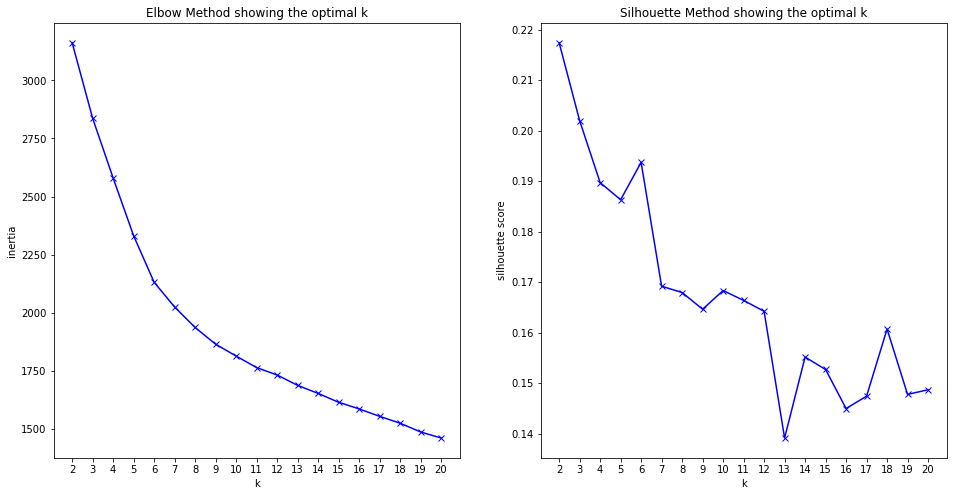

In [22]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

In [23]:
kmeans = KMeans(n_clusters=13, random_state=1)
kmeans.fit(No_bankrupcies)

KMeans(n_clusters=13, random_state=1)

In [24]:
clusters = kmeans.predict(No_bankrupcies)

elem_in_cluster = pd.Series(clusters).value_counts().sort_index() # Number of values in each cluster
elem_in_cluster

0     327
1     476
2     621
3     516
4     397
5     450
6     306
7     382
8     240
9     378
10    385
11    133
12    668
dtype: int64

In [25]:
clusters_weight = []
for j in range(len(elem_in_cluster)):
    weight = elem_in_cluster[j]/len(No_bankrupcies)
    clusters_weight.append(weight)

In [26]:
No_bankrupcies["cluster"] = clusters
No_bankrupcies


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Quick Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Total Asset Turnover,Average Collection Days,Fixed Assets Turnover Frequency,Revenue per person,Operating profit per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Current Liabilities/Liability,Retained Earnings to Total Assets,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,CFO to Assets,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,Liability to Equity,Equity to Liability,Bankrupt?,cluster
2542,0.517184,0.595181,0.561647,0.000000e+00,7.717944e-13,0.186355,0.192954,0.192954,0.192954,0.230595,0.108135,0.192815,0.066466,5.244967e-14,5.562521e-13,3.929320e-13,0.088430,0.911570,0.005192,0.371884,0.007290,0.108139,0.191878,0.335832,1.909667e-13,4.482950e-14,8.952817e-12,0.401404,0.751356,0.171034,0.184907,0.019934,1.896346e-13,0.057453,0.367288,0.603629,0.951720,0.052945,9.140000e-03,1.290000e-01,6.540000e-02,5.803651e-11,0.115561,0.642290,0.047557,0.0,0.830270,5.814095e-13,0.277612,0.043263,0,6
1809,0.530249,0.538432,0.570962,3.363384e-14,0.000000e+00,0.000000,0.173992,0.173992,0.173992,0.215184,0.095106,0.171349,0.720721,4.841899e-14,3.687891e-12,1.744937e-13,0.047042,0.952958,0.005991,0.369637,0.005366,0.095111,0.170357,0.085457,6.101105e-13,2.067306e-14,8.636050e-13,0.391895,0.921106,0.787858,0.754803,0.131380,1.698972e-12,0.042138,0.376574,0.806740,0.922722,0.032573,3.752457e-14,3.989659e-14,1.746463e-14,2.246573e-11,0.110933,0.622632,0.008567,0.0,0.800269,3.848267e-14,0.276037,0.081620,0,0
4322,0.514649,0.579427,0.564484,5.941884e-02,3.778156e-13,0.118129,0.206565,0.206565,0.206565,0.242980,0.119941,0.195601,0.596597,4.994086e-14,9.100095e-13,6.394434e-13,0.121293,0.878707,0.010607,0.369637,0.005754,0.119954,0.194691,0.340330,5.084839e-13,9.289247e-13,7.915490e-12,0.402535,0.849637,0.563323,0.744841,0.164218,7.561791e-13,0.119202,0.350225,0.929519,0.948818,0.047951,7.470000e-01,5.870000e-01,5.090000e-01,3.423857e-12,0.110933,0.602408,0.024939,0.0,0.825276,2.129843e-13,0.279389,0.030795,0,9
3933,0.505484,0.557894,0.548156,5.284102e-14,1.220324e-12,0.306610,0.217564,0.217564,0.217564,0.227664,0.106995,0.184228,0.669670,4.829061e-14,2.203583e-12,2.077044e-13,0.054358,0.945642,0.006713,0.369760,0.005587,0.106958,0.183244,0.028486,6.069511e-13,1.219181e-14,1.258729e-12,0.403903,0.826426,0.409265,0.392087,0.221474,3.264634e-12,0.036908,0.363156,0.615800,0.938185,0.029146,5.703645e-14,6.032370e-14,8.428286e-14,1.408309e-11,0.111261,0.606112,0.014551,0.0,0.811530,5.463042e-13,0.276277,0.070907,0,5
1784,0.504168,0.561928,0.549708,2.615230e-01,6.293559e-13,0.216115,0.174413,0.174413,0.174413,0.223598,0.116440,0.179257,0.672673,5.010134e-14,6.159326e-13,1.008155e-12,0.154881,0.845119,0.007876,0.378281,0.005366,0.116453,0.178275,0.206897,8.715488e-13,2.896500e-13,1.675194e-12,0.396373,0.844396,0.623509,0.824909,0.081422,2.988600e-13,0.149663,0.347908,0.920141,0.935566,0.068622,1.556919e-14,1.202105e-14,4.340000e-01,5.522568e-12,0.112961,0.600923,0.028316,0.0,0.808609,3.058725e-14,0.282046,0.023375,0,3
...,...,...,...,...,...,...,...,...,...,...,...,.

In [27]:
new_No_bankrupcies = pd.DataFrame(columns=No_bankrupcies.columns, dtype=float)
 
for cluster, weight in enumerate(clusters_weight):
    new_No_bankrupcies = pd.concat([new_No_bankrupcies, No_bankrupcies[No_bankrupcies["cluster"]==cluster].sample(round(400*weight))], axis=0)
    
new_No_bankrupcies.drop(columns=['cluster'], inplace=True)

In [28]:
final1_df = pd.concat([new_No_bankrupcies, upsample], axis=0)
final1_df = final1_df.sort_index()

In [29]:
final1_df.shape

(800, 51)

In [30]:
y_train = final1_df['Bankrupt?'].astype('int')
X_train = final1_df.drop(['Bankrupt?'], axis=1)

# Predicting with KNN

In [31]:
# entrenar distintos modelos con distintos valores de k
K = range(2, 14, 3)
accuracies = []
models = []

for k in K:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'uniform') 
    knn.fit(X_train, y_train)
    models.append(knn)
    ypred_train = knn.predict(X_train)
    accuracies.append(accuracy_score(y_train, ypred_train))
    print("The accuracy of the model n_neighbors={} is: {:.2f}".format(k, accuracy_score(y_train, ypred_train)))
    print("The kappa of the model n_neighbors={} is: {:.2f}".format(k, cohen_kappa_score(y_train, ypred_train)))

The accuracy of the model n_neighbors=2 is: 0.98
The kappa of the model n_neighbors=2 is: 0.96
The accuracy of the model n_neighbors=5 is: 0.89
The kappa of the model n_neighbors=5 is: 0.77
The accuracy of the model n_neighbors=8 is: 0.86
The kappa of the model n_neighbors=8 is: 0.73
The accuracy of the model n_neighbors=11 is: 0.83
The kappa of the model n_neighbors=11 is: 0.67


In [32]:
K = range(2, 14, 3)
#accuracies = []

for i in range(len(models)):
    #knn = KNeighborsClassifier(n_neighbors=k) 
    knn = models[i]
    ypred_test = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, ypred_test))
    print("The accuracy of the model n_neighbors={} is: {:.2f}".format(list(K)[i], accuracy_score(y_test, ypred_test)))
    print("The kappa score of the model n_neighbors={} is: {:.2f}".format(list(K)[i],cohen_kappa_score(y_test, ypred_test)))

The accuracy of the model n_neighbors=2 is: 0.88
The kappa score of the model n_neighbors=2 is: 0.22
The accuracy of the model n_neighbors=5 is: 0.74
The kappa score of the model n_neighbors=5 is: 0.13
The accuracy of the model n_neighbors=8 is: 0.80
The kappa score of the model n_neighbors=8 is: 0.15
The accuracy of the model n_neighbors=11 is: 0.74
The kappa score of the model n_neighbors=11 is: 0.12


In [33]:
knn = KNeighborsClassifier(n_neighbors=2) 
knn.fit(X_train, y_train)
ypred_train = knn.predict(X_train)
ypred_test = knn.predict(X_test)
display(y.value_counts())


0    6599
1     220
Name: Bankrupt?, dtype: int64

In [34]:
display(confusion_matrix(ypred_train, y_train))

array([[400,  17],
       [  0, 383]], dtype=int64)

In [35]:
display(confusion_matrix(ypred_test, y_test))

array([[1164,   14],
       [ 156,   30]], dtype=int64)

# Random Forest

In [36]:
clf = RandomForestClassifier(max_depth=4,
                             min_samples_split=6,
                             min_samples_leaf =3,
                             max_samples=0.8, random_state=8)
                            
clf.fit(X_train, y_train)

print("The accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The accuracy for the Random Forest in the TEST set is {:.2f}".format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_train)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_train, y_pred))
display(cohen_kappa_score(y_train, y_pred))

y_pred = clf.predict(X_test)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_test, y_pred))
display(cohen_kappa_score(y_test, y_pred))


The accuracy for the Random Forest in the TRAIN set is 0.93
The accuracy for the Random Forest in the TEST set is 0.85


1    435
0    365
dtype: int64

0    6599
1     220
Name: Bankrupt?, dtype: int64

array([[353,  47],
       [ 12, 388]], dtype=int64)

0.8525

0    1123
1     241
dtype: int64

0    6599
1     220
Name: Bankrupt?, dtype: int64

array([[1120,  200],
       [   3,   41]], dtype=int64)

0.2466179815635101

### Grid Search-Accuracy

In [37]:
##### from sklearn.model_selection import GridSearchCV

max_depth_choices= [2, 3, 5,7,9] 
min_samples_split_choices = [2,4,6,8,9]  
min_samples_leaf_choices = [1,3] 
max_samples=[0.8,0.5]
#n_jobs = [-1]

grid = {'max_depth': max_depth_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices,
        'max_samples':max_samples}

model = RandomForestClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5) 
grid_search.fit(X_train, y_train)
grid_search.best_score_

0.8400000000000001

In [38]:
grid_search.best_params_

{'max_depth': 5,
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [39]:
clf = RandomForestClassifier(**grid_search.best_params_, random_state =8)
                          
clf.fit(X_train, y_train)

print("The accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The accuracy for the Random Forest in the TEST set is {:.2f}".format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_train)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_train, y_pred))
display(cohen_kappa_score(y_train, y_pred))

y_pred = clf.predict(X_test)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_test, y_pred))
display(cohen_kappa_score(y_test, y_pred))


The accuracy for the Random Forest in the TRAIN set is 0.94
The accuracy for the Random Forest in the TEST set is 0.86


1    436
0    364
dtype: int64

0    6599
1     220
Name: Bankrupt?, dtype: int64

array([[357,  43],
       [  7, 393]], dtype=int64)

0.875

0    1128
1     236
dtype: int64

0    6599
1     220
Name: Bankrupt?, dtype: int64

array([[1126,  194],
       [   2,   42]], dtype=int64)

0.25974658869395706

### Grid Search-Cohen Kappa

In [40]:
coh_kap = make_scorer(cohen_kappa_score, weights='quadratic')

grid1 = GridSearchCV(estimator=clf, param_grid=grid, scoring=coh_kap, cv=5)

In [41]:
grid1.fit(X_train, y_train)
grid1.best_score_

0.68

In [42]:
grid1.best_params_

{'max_depth': 7,
 'max_samples': 0.8,
 'min_samples_leaf': 3,
 'min_samples_split': 9}

In [43]:
clf = RandomForestClassifier(**grid1.best_params_, random_state =8)
                          
clf.fit(X_train, y_train)

print("The accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The accuracy for the Random Forest in the TEST set is {:.2f}".format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_train)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_train, y_pred))
display(cohen_kappa_score(y_train, y_pred))

y_pred = clf.predict(X_test)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_test, y_pred))
display(cohen_kappa_score(y_test, y_pred))

The accuracy for the Random Forest in the TRAIN set is 0.97
The accuracy for the Random Forest in the TEST set is 0.87


1    416
0    384
dtype: int64

0    6599
1     220
Name: Bankrupt?, dtype: int64

array([[380,  20],
       [  4, 396]], dtype=int64)

0.94

0    1150
1     214
dtype: int64

0    6599
1     220
Name: Bankrupt?, dtype: int64

array([[1147,  173],
       [   3,   41]], dtype=int64)

0.2792602377807133

## Feature Extraction-SHAP

In [44]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X)

In [45]:
#shap.dependence_plot(' Persistent EPS in the Last Four Seasons', shap_values[0], X)

In [ ]:
shap.summary_plot(shap_values, X)
plt.savefig("Kbest50RandomForestSHAP")

# XGBoost

In [46]:
import xgboost as xgb

In [47]:
xgb_cl = xgb.XGBClassifier()

In [48]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [49]:
print("The accuracy for the XGB in the TRAIN set is {:.2f}".format(xgb_cl.score(X_train, y_train)))
print("The accuracy for the XGB in the TEST set is {:.2f}".format(xgb_cl.score(X_test, y_test)))

y_pred = pd.Series(xgb_cl.predict(X_train))
display(pd.DataFrame(y_pred).value_counts())
display(confusion_matrix(y_train, y_pred))
display(cohen_kappa_score(y_train, y_pred))

y_pred = pd.Series(xgb_cl.predict(X_test))
display(pd.DataFrame(y_pred).value_counts())
display(confusion_matrix(y_test, y_pred))
display(cohen_kappa_score(y_test, y_pred))

The accuracy for the XGB in the TRAIN set is 1.00
The accuracy for the XGB in the TEST set is 0.90


0    400
1    400
dtype: int64

array([[400,   0],
       [  0, 400]], dtype=int64)

1.0

0    1198
1     166
dtype: int64

array([[1194,  126],
       [   4,   40]], dtype=int64)

0.34768533505988997

Learning_rate: also called eta, it specifies how quickly the model fits the residual errors by using additional base learners.typical values: 0.01–0.2

Gamma, reg_alpha, reg_lambda: these 3 parameters specify the values for 3 types of regularization done by XGBoost - minimum loss reduction to create a new split, L1 reg on leaf weights, L2 reg leaf weights respectively.Typical values for gamma: 0 - 0.5 but highly dependent on the data. Typical values for reg_alpha and reg_lambda: 0 - 1 is a good starting point but again, depends on the data.

Max_depth - how deep the tree's decision nodes can go. Must be a positive integer. typical values: 1–10

Subsample - fraction of the training set that can be used to train each tree. If this value is low, it may lead to underfitting or if it is too high, it may lead to overfitting. typical values: 0.5–0.9

Colsample_bytree- fraction of the features that can be used to train each tree. A large value means almost all features can be used to build the decision tree. typical values: 0.5–0.9

The above are the main hyperparameters people often tune. It is perfectly OK if you don’t understand them all completely (like me) but you can refer to this post which gives a thorough overview of how each of the above parameters works and how to tune them.



### Grid Search-Accuracy

In [ ]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.01, 0.2],
    "gamma": [0, 0.5, 1],
    "reg_lambda": [0, 0.5, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
    "reg_alpha": [0, 0.5, 1, 10]
}

In [ ]:
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

In [ ]:
grid_cv.best_score_


In [ ]:
grid_cv.best_params_

In [ ]:
final_cl = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic")
_ = final_cl.fit(X_train, y_train)
preds = final_cl.predict(X_test)

print("The accuracy for the XGB in the TRAIN set is {:.2f}".format(final_cl.score(X_train, y_train)))
print("The accuracy for the XGB in the TEST set is {:.2f}".format(final_cl.score(X_test, y_test)))

y_pred = pd.Series(final_cl.predict(X_train))
display(pd.DataFrame(y_pred).value_counts())
display(confusion_matrix(y_train, y_pred))
display(cohen_kappa_score(y_train, y_pred))

y_pred = pd.Series(final_cl.predict(X_test))
display(pd.DataFrame(y_pred).value_counts())
display(confusion_matrix(y_test, y_pred))
display(cohen_kappa_score(y_test, y_pred))


### Grid Search-Cohen Kappa

In [50]:
coh_kap = make_scorer(cohen_kappa_score, weights='quadratic')

grid2 = GridSearchCV(estimator=xgb_cl, param_grid=grid, scoring=coh_kap, cv=5)

In [51]:
grid2.fit(X_train, y_train)
grid2.best_score_

[12:24:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:24:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:24:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:24:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:24:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:24:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:24:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:24:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:24:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:24:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:24:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:25:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:25:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:25:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:25:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:25:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:25:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:25:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:25:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:25:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:25:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:25:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:25:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:25:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:25:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:25:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[12:25:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:25:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

0.6625

In [52]:
grid2.best_params_

{'max_depth': 9,
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [53]:
final_cl = xgb.XGBClassifier(
    **grid2.best_params_,
    objective="binary:logistic")
_ = final_cl.fit(X_train, y_train)
preds = final_cl.predict(X_test)

print("The accuracy for the XGB in the TRAIN set is {:.2f}".format(final_cl.score(X_train, y_train)))
print("The accuracy for the XGB in the TEST set is {:.2f}".format(final_cl.score(X_test, y_test)))

y_pred = pd.Series(final_cl.predict(X_train))
display(pd.DataFrame(y_pred).value_counts())
display(confusion_matrix(y_train, y_pred))
display(cohen_kappa_score(y_train, y_pred))

y_pred = pd.Series(final_cl.predict(X_test))
display(pd.DataFrame(y_pred).value_counts())
display(confusion_matrix(y_test, y_pred))
display(cohen_kappa_score(y_test, y_pred))

[12:25:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


The accuracy for the XGB in the TRAIN set is 1.00
The accuracy for the XGB in the TEST set is 0.91


0    400
1    400
dtype: int64

array([[400,   0],
       [  0, 400]], dtype=int64)

1.0

0    1205
1     159
dtype: int64

array([[1201,  119],
       [   4,   40]], dtype=int64)

0.3618410041841005

## Feature extraction-SHAP

In [54]:
explainer = shap.TreeExplainer(final_cl)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
#shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :])

In [ ]:
#shap.dependence_plot( ' Quick Ratio', shap_values, X)

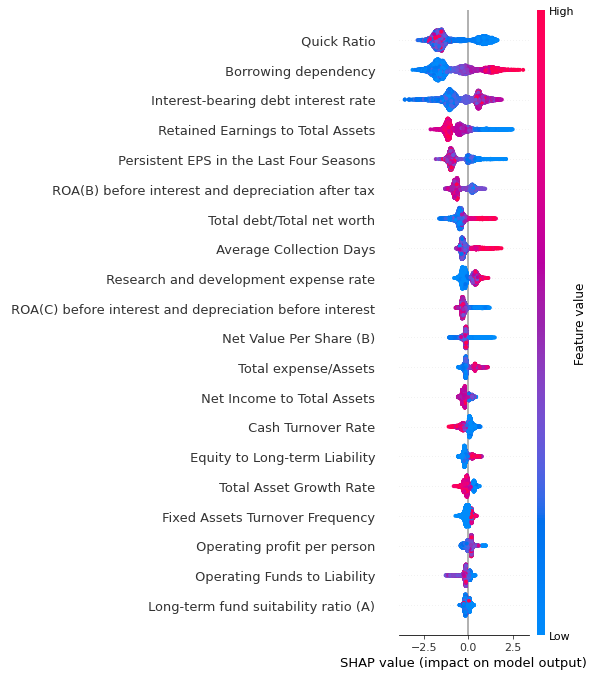

<Figure size 432x288 with 0 Axes>

In [55]:
shap.summary_plot(shap_values, X)
plt.savefig("Kbest50XGBSHAPimpact on model output.png")

# K-fold Cross validation

In [ ]:
a = np.zeros(shape=(4, 12))

pd.DataFrame(a)

In [ ]:
# Aplicamos CV-10 a todos los modelos para tner una mejor estimacion del accuracy y menor varianza
nfolds = 10
models = [knn, clf, xgb_cl]
cv_scores = np.zeros((len(models), nfolds))

for i, model in enumerate(models):
    scores = cross_val_score(model, X, y, scoring='roc', cv=nfolds)
    cv_scores[i] = scores
    
cv_df = pd.DataFrame(cv_scores, index=[models])
cv_df['mean_score'] = cv_df.mean(1)
cv_df['std_score'] = cv_df.std(1)